In [1]:
import serial
import pyautogui as pg
from time import sleep
from svgpathtools import svg2paths, wsvg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
l2 = 100
d = 80
l1 = 60
def inverse_kinematics(row):
    x, y = row[['x','y']]
    C = np.sqrt(x**2+y**2)
    e = np.sqrt((d-x)**2+y**2)
    q1 = np.arctan2(y,x)+np.arccos((l1**2+C**2-l2**2)/(2*l1*C))
    q2 = np.pi-np.arctan2(y,d-x)-np.arccos((l1**2+e**2-l2**2)/(2*l1*e))
    return np.rad2deg([q1, q2])

In [3]:
def forward_kinematics(row):
    l2 = 100
    d = 80
    l1 = 60
    q1, q2 = row[['q1', 'q2']]
    q1, q2 = np.deg2rad([q1, q2])
    
    A = l1*np.array([np.cos(q1), np.sin(q1)])
    B = np.array([d+l1*np.cos(q2), l1*np.sin(q2)])
    D = B-A
    
    psi = np.arctan2(D[1], D[0])
    h = np.linalg.norm(D)
    del1 = np.arccos(h/(2*l2))
    phi1 = del1+psi
    C = A+l2*np.array([np.cos(phi1), np.sin(phi1)])
    return C

In [ ]:
def get_mouse_location():
    x, y = pg.position()
    x = x/1920*180 - 90 + 40
    y = (1-y/1080)*150
    return int(x), int(y)

In [23]:
result['x'].min()

-552.30237

In [79]:
paths, attributes = svg2paths('name.svg')
result = []
for path in paths:
    for line in path:
        x = line.start.real
        y = line.start.imag
        result.append((x,y))

result = pd.DataFrame(result, columns= ['x', 'y'])
result['x'] = -result['x']
result['x'] += 80
result['y'] += 50

result[['q1', 'q2']] = result.apply(inverse_kinematics, axis=1, result_type='expand')
result = result.dropna()


C:\Users\shameel.abdulla\AppData\Local\Temp\ipykernel_21928\3343175272.py:8: RuntimeWarning: invalid value encountered in arccos
  q1 = np.arctan2(y,x)+np.arccos((l1**2+C**2-l2**2)/(2*l1*C))
C:\Users\shameel.abdulla\AppData\Local\Temp\ipykernel_21928\3343175272.py:9: RuntimeWarning: invalid value encountered in arccos
  q2 = np.pi-np.arctan2(y,d-x)-np.arccos((l1**2+e**2-l2**2)/(2*l1*e))
C:\Users\shameel.abdulla\AppData\Local\Temp\ipykernel_21928\3343175272.py:8: RuntimeWarning: invalid value encountered in arccos
  q1 = np.arctan2(y,x)+np.arccos((l1**2+C**2-l2**2)/(2*l1*C))
C:\Users\shameel.abdulla\AppData\Local\Temp\ipykernel_21928\3343175272.py:9: RuntimeWarning: invalid value encountered in arccos
  q2 = np.pi-np.arctan2(y,d-x)-np.arccos((l1**2+e**2-l2**2)/(2*l1*e))
C:\Users\shameel.abdulla\AppData\Local\Temp\ipykernel_21928\3343175272.py:8: RuntimeWarning: invalid value encountered in arccos
  q1 = np.arctan2(y,x)+np.arccos((l1**2+C**2-l2**2)/(2*l1*C))
C:\Users\shameel.abdulla\AppD

(24.773914399999963, 82.6298136, 52.05784826499991, 105.25006503500002)

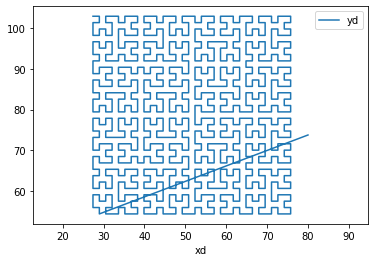

In [80]:
result[['xd', 'yd']] = result.apply(forward_kinematics, axis=1, result_type='expand')
result.plot('xd', 'yd')
plt.axis('equal')

In [81]:
with serial.Serial(port='COM6', baudrate=9600) as ser:
    x = input("command")
    ser.write(x.encode())
    sleep(3)
    print("Sending mouse commands")
    s = 0
    command = f's100'
    print(command)
    ser.write(command.encode())
    for i, row in result.iterrows():

        x, y = (row[['q1', 'q2']]).astype(float)
        command = f'x{x:.7f}y{y:.7f}u'
        print(command)
        ser.write(command.encode())
        
        while ser.read().decode()!='g':
            pass
        
    x, y = [0.0,0.0]    
    command = f'x{x}y{y}u'
    print(command)
    ser.write(command.encode())

command h


Sending mouse commands
s100
x142.3916119y57.1396894u
x141.2493210y55.8741220u
x142.2351325y55.0894122u
x143.3934247y56.3664827u
x144.3902162y55.6089514u
x145.3826893y54.8666493u
x144.1902713y53.5647520u
x143.2152245y54.3197711u
x142.0298773y53.0360455u
x142.9876268y52.2678483u
x141.7752752y50.9761349u
x140.8346639y51.7579539u
x139.8875617y52.5531534u
x141.0663579y53.8182486u
x140.0964220y54.6149068u
x138.9333481y53.3621873u
x137.7605123y52.1161299u
x138.6991836y51.2943117u
x137.5016518y50.0419417u
x136.5783169y50.8769337u
x135.3871442y49.6448218u
x134.1873555y48.4200406u
x135.0807359y47.5576132u
x136.2953740y48.7962866u
x137.1944328y47.9596773u
x135.9642703y46.7064595u
x136.8384898y45.8660845u
x138.0848717y47.1345121u
x139.3234253y48.4091975u
x138.4164970y49.2195198u
x139.6300520y50.4856995u
x140.5537135y49.6898325u
x141.4707438y48.9062905u
x142.3816949y48.1346982u
x141.1157029y46.8231676u
x140.2229863y47.6105431u
x138.9672162y46.3203455u
x137.7038977y45.0360263u
x138.5609644y44.215861

In [272]:
with serial.Serial(port='COM3', baudrate=9600) as ser:
    x = input("command")
    ser.write(x.encode())
    sleep(3)
    print("Sending mouse commands")
    while True:
        x, y = get_mouse_location()
        command = f'x{x}y{y}u'
        ser.write(command.encode())
        try:
            if keyboard.is_pressed('q'): # it will stop working by clicking q you can change to to any key
                break
        except:
            pass
    

commandh
Sending mouse commands


NameError: name 'get_mouse_location' is not defined

In [102]:
import numpy as np

def InverseKinematics(x, y):
    q1 = np.arctan2(y, x) + np.arccos((-1 * np.power(l2, 2) + np.power(l1, 2) + np.power(x, 2) + np.power(y, 2)) / (2 * l1 * np.sqrt(np.power(x, 2) + np.power(y, 2))))
    dif_dx = (d - x)
    q2 = np.pi - np.arctan2(y, dif_dx) - np.arccos((-1 * np.power(l2, 2) + np.power(l1, 2) + np.power(dif_dx, 2) + np.power(y, 2)) / (2 * l1 * np.sqrt(np.power(dif_dx, 2) + np.power(y, 2))))
    return np.degrees(q1), np.degrees(q2)  # return q1 in degrees

def ForwardKinematics(q1_deg, q2_deg):
    q1 = np.radians(q1_deg)
    q2 = np.radians(q2_deg)
    a = 2 * l2 * l1 * np.sin(q2) - 2 * l1 * l2 * np.sin(q1)
    b = 2 * l2 * d - 2 * l1 * l2 * np.cos(q1) + 2 * l2 * l1 * np.cos(q2)
    c = np.power(l1, 2) - np.power(l2, 2) + np.power(l2, 2) + np.power(l1, 2) + np.power(d, 2) - l1 * l1 * np.sin(q1) * np.sin(q2) - 2 * l1 * d * np.cos(q1) + 2 * l1 * d * np.cos(q2) - 2 * l1 * l1 * np.cos(q1) * np.cos(q2)
    theta2 = 2 * np.arctan2((a + np.sqrt(np.power(a, 2) + np.power(b, 2) - np.power(c, 2))), (b - c))
    theta1 = np.arcsin((l2 * np.sin(theta2) + l1 * np.sin(q2) - l1 * np.sin(q1)) / l2)
    x0 = l1 * np.cos(q1) + l2 * np.cos(theta1)
    y0 = l1 * np.sin(q1) + l2 * np.sin(theta1)
    return x0, y0


In [103]:
l2 = 100
d = 80
l1 = l2-d/2
x = np.arange(-30,30,2)
y = 110
q1, q2 = InverseKinematics(x,y)

print(q1, q2)

[166.41403446 165.85451286 165.2592327  164.62842809 163.96236146
 163.261326   162.52564763 161.75568667 160.95183906 160.11453716
 159.24425017 158.3414841  157.40678127 156.44071939 155.44391027
 154.41699802 153.36065692 152.27558883 151.16252034 150.02219951
 148.85539236 147.66287903 146.44544983 145.20390102 143.93903043
 142.65163306 141.34249651 140.01239645 138.66209204 137.29232139] [117.4630411  114.30225126 111.43942114 108.78752787 106.29437035
 103.9257331  101.65776466  99.47306773  97.35850558  95.30388517
  93.30112355  91.34369721  89.42626526  87.54440389  85.69441454
  83.87318226  82.07806927  80.30683355  78.55756577  76.82863978
  75.11867325  73.42649614  71.75112515  70.09174279  68.4476802
  66.81840278  65.20349816  63.60266603  62.01570937  60.44252688]


In [104]:
x_F, y_F = ForwardKinematics(q1, q2)

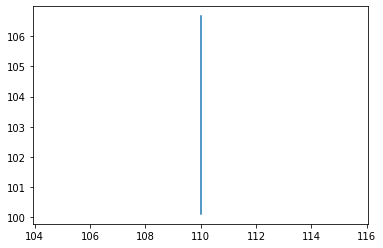

In [107]:
plt.plot([y]*len(y_F), y_F)